# Chapter 5 Resampling Methods

## 5.1 Cross-validation

### R1
When we fit a model to data, which is typically larger?

1. Test Error
2. Training Error

Answer: 1
Training error almost always underestimates test error, sometimes dramatically

## 5.2 K-fold Cross-Validation

### R1
Suppose we want to use cross-valiation to estimate the error of the following procedure:

Step 1: Find the k variables most correlated with y  
Step 2: Fit a linear regression using those variables as predictors

We will estimate the error for each k from 1 to p, and then choose the best k.

True or false: a correct cross-validation procedure will possibly choose a different set of k variables for every fold.

Answer: True  
We need to replicate our entire procedure for each training/validation split. That means the decision about which k variables are the best must be made on the basis of the training set alone. In general, different training sets will disagree on which are the best k variables.

## 5.3 Cross-Validation: the wrong and right way

### R1
Suppose that we perform forward stepwise regression and use cross-validation to choose the best model size.  

Using the full data set to choose the sequence of models is the WRONG way to do cross-validation (we need to redo the model selection step within each training fold). If we do cross-validation the WRONG way, which of the following is true?

1. The selected model will probably be too complex.
2. The selected model will probably be too simple.

Answer: 1  
Using the full data set to choose the best variables means that we do not pay as much price as we should for overfitting (since we are fitting to the test and training set simultaneously). This will lead us to underestimate test error for every model size, but the bias is worst for the most complex models. Therefore, we are likely to choose a model that is more complex than the optimal model.

## 5.4 The Bootstrap

### R1
One way of carrying out the bootstrap is to average equally over all possible bootstrap samples from the original data set (where two bootstrap data sets are different if they have the same data points but un different order). Unlike the usual implementation of the bootstrap, this method has the advantage of not introducing extra noise due to resampling randomly. (You can use `^` to denote power, as in `n^2`)

To carry out this implementation on a data set with `n` data points, how many bootstrap data sets would we need to average over?

Answer: $n^n$  
Completely removing the bootstrap resampling noise is usually not worth incurring the extreme computational cost. If B is large, but still less than $n^n$, random resampling gives a good Monte Carlo estimate of the idealized bootstrap estimate for all $n^n$ data sets.

## 5.5 More on the Bootstrap

### R1
If we have $n$ data points, what is th eprobability that a given data point does not appear in a bootstrap sample?

Answer: $(1-\frac{1}{n})^n$  
To construct a bootstrap sample, we repeatedly drawa a single data point from a sample of size $n$, $n$ times. Any given data point has a $1 - \frac{1}{n}$ chance of not being selected in each draw. Hence, the chance of not being selected in any of the $n$ draws is $(1 - \frac{1}{n})^n$

## 5.R Resampling in R

### R1
Download the file `5.R.RData` and load it into R using `load("5.R.RData")`. Consider the linear regression model of $y$ on $X1$ and $X2$. What is the standard error for $\beta_1$?

Answer: $0.02593$  
Use `summary(lm(y~.,data=Xy)`

In [1]:
load("5.R.RData")
summary(lm(y~.,data=Xy))


Call:
lm(formula = y ~ ., data = Xy)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.44171 -0.25468 -0.01736  0.33081  1.45860 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.26583    0.01988  13.372  < 2e-16 ***
X1           0.14533    0.02593   5.604 2.71e-08 ***
X2           0.31337    0.02923  10.722  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5451 on 997 degrees of freedom
Multiple R-squared:  0.1171,	Adjusted R-squared:  0.1154 
F-statistic: 66.14 on 2 and 997 DF,  p-value: < 2.2e-16


### R2
Next, plot the data using `matplot(Xy, type="l")`. Which of the following do you think is most likely given what you see?
1. Our estimate of $\text{S.E.}(\hat{\beta}_1)$ is too high.
2. Our estimate of $\text{S.E.}(\hat{\beta}_1)$ is too low.
3. Our estimate of $\text{S.E.}(\hat{\beta}_1)$ is about right.

Answer: 2  
There is very strong autocorrelation between consecutive rows of the data matrix. Roughly speaking, we have about $10$-$20$ repeats of every data point, so the sample size is in effect much smaller than the number of rows (1000 in this case).

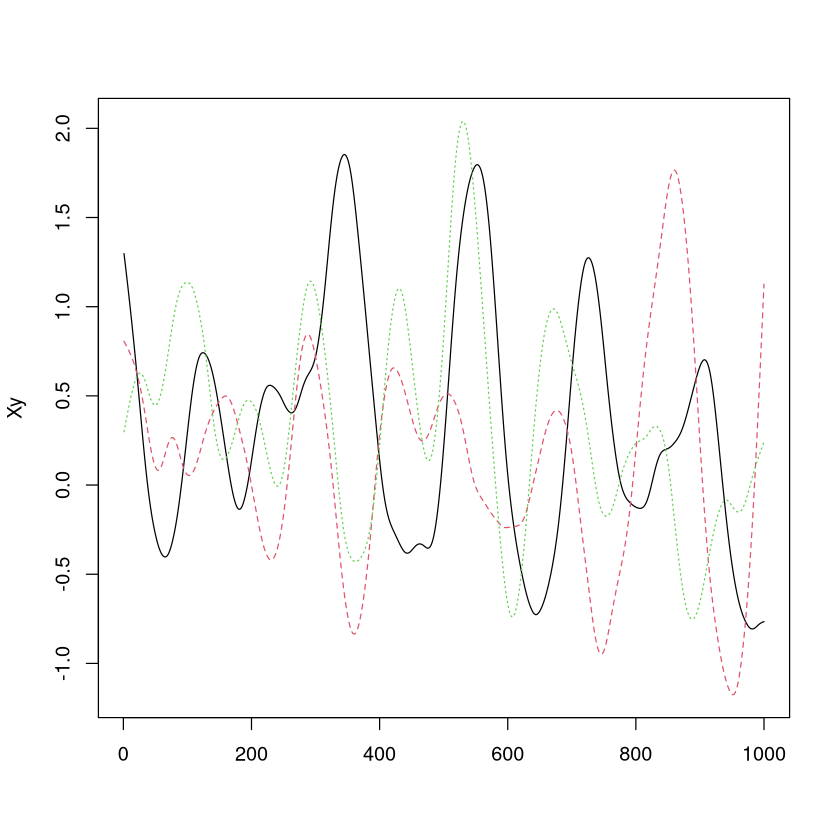

In [2]:
matplot(Xy, type="l")

### R3
Now use the standard bootstrap to estimate $\text{S.E.}(\hat{\beta}_1)$. To within $10\%$, what do you get.

Answer: $0.0284$  
When we do the i.i.d. bootstrap, we are relying on the original sampling having been i.i.d. That is the same assumption that screwed us up when we used `lm`.

In [6]:
require(boot)
boot.fn <- function(data, index) {
    coef(
        lm(y ~ ., data = data, subset = index)
        )
    }

set.seed(1)
boot(Xy, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Xy, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.2658349 -1.188106e-05  0.01440859
t2* 0.1453263  1.251786e-03  0.02844047
t3* 0.3133670  1.747301e-03  0.03538656

### R4
Finally, use the block bootstrap to estimate $\text{S.E.}(\hat{\beta}_1)$. Use blocks of $100$ contiguous observations, and resample ten whole blocks with replacement then paste them together to construct each bootstrap time series. For example, one of your bootstrap resamples could be:

`new.rows = c(101:200, 401:500, 101:200, 901:1000, 301:400, 1:100, 1:100, 801:900, 201:300, 701:800)`  
`new.Xy = Xy[new.rows,]`  

To within $10\%$, what do you get?

Answer:

In [4]:
require(boot)
boot.fn <- function(data, index) {
    coef(
        lm(y ~ X1, data = data, subset = index)
        )
    }
#new.rows = c(101:200, 401:500, 101:200, 901:1000, 301:400, 1:100, 801:900, 1:100, 201:300, 701:800)
set.seed(3)
new.rows = c()
for (x in 1:10){
    max = round(runif(n=1,min=1,max=10))*100
    min = max - 99
    new.rows = c(new.rows,min:max)
}
new.Xy = Xy[new.rows,]
set.seed(5)
boot(new.Xy, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = new.Xy, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.2812732  0.0006732113  0.02810875
t2* 0.2155465 -0.0016879090  0.03360861

In [5]:
max = round(runif(n=10,min=1,max=10))*100
min = max - 99
min:max

Warning message in min:max:
“numerical expression has 10 elements: only the first used”


[1] 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 [19] 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 [37] 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 [55] 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 [73] 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 [91] 191 192 193 194 195 196 197 198 199 200

## Chapter 5 Quiz

### Q1
If we use ten-fold cross-validation as a means of model selection, the cross-validation estimate of test error is:
1. biased upward
2. biased downward
3. unbiased
4. potentially any of the above

Answer: 4  
There are competing biases: on one hand, the cross-validated estimate is based on models trained on smaller training sets than the full model, which means we will tend to overestimate test error for the full model. On the other hand, cross-validation gives a noisy estimate of test error for each candidate model, and we select the model with the best estimate. This means we are more likely to choose a model whose estimate is smaller than its true test error rate, hence, we may underestimate test error. In any given case, either source of bias may dominate the other.

### Q2
Why can't we use the standard bootstrap for some time series data?
1. The data points in most time series aren't i.i.d.
2. Some points will be used twice in the same sample.
3. The standard bootstrap doesn't accurately mimic the real-world data-generating mechanism.

Answer: 1, 3  
The bootstrap always involves using some points more than once in each resample, but that doesn't inherently make it incorrect (unless we are trying to gauge prediction error). The real problem in this case is that the usual bootstrap algorithm samples i.i.d., so there is no serial autocorrelation (unlike what is observed in most time series). This makes the set of resampled time series very very different from the sorts of time series we actually get in the real world.